The project aims to develop an automated API data extractor tailored for retrieving cryptocurrency data for the leading 15 cryptocurrencies. Utilizing the coinmarketcap.com API, the function will extract data at 30 minute intervals, repeating the process ten times. Although the extraction is currently limited to a set number of cryptocurrencies, iterations, and timestamps, the system is designed to be flexible for future adjustments to accommodate varying usage requirements.

# Importing Libraries

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time, sleep
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
warnings.filterwarnings("ignore")

# Getting the data from the API

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1caff716-bd38-4072-814b-59630010c3b8',  # API Key from coinmarketcap.com
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-04-05T09:29:53.258Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9475}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10957, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

# Converting the data into a dataframe

In [3]:
df = pd.json_normalize(data["data"])

In [4]:
## Creating a column for timestamp
df['timestamp'] = pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10957,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967362e+07,1.967362e+07,False,NaN,1,NaN,NaN,None,2024-04-05T09:28:00.000Z,66573.454048,3.715420e+10,22.6333,-1.436281,0.497820,-4.751714,-0.610653,55.009037,52.151432,1.309741e+12,52.8248,1.398043e+12,None,2024-04-05T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
1,1027,Ethereum,ETH,ethereum,8726,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200682e+08,1.200682e+08,True,NaN,2,NaN,NaN,None,2024-04-05T09:27:00.000Z,3263.319036,1.543062e+10,9.4306,-1.328857,-2.061571,-7.775687,-15.222166,40.823441,45.699348,3.918207e+11,15.8030,3.918207e+11,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
2,825,Tether USDt,USDT,tether,81448,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.066015e+11,1.099426e+11,True,NaN,3,NaN,NaN,None,2024-04-05T09:27:00.000Z,0.999878,7.036762e+10,5.4836,-0.012893,0.021413,-0.026900,-0.067455,0.092399,-0.094729,1.065884e+11,4.2989,1.099292e+11,None,2024-04-05T09:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 15:01:07.357688
3,1839,BNB,BNB,bnb,2131,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495353e+08,1.495353e+08,False,NaN,4,NaN,NaN,None,2024-04-05T09:27:00.000Z,575.149481,2.214799e+09,-1.2401,-0.922901,-1.528931,-5.818312,39.531639,88.898661,87.935739,8.600517e+10,3.4688,8.600517e+10,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.449277e+08,5.733561e+08,True,NaN,5,NaN,NaN,None,2024-04-05T09:27:00.000Z,171.706185,4.871006e+09,35.0771,-2.862246,-7.289450,-7.212631,29.939983,76.976100,79.731659,7.639685e+10,3.0813,9.844879e+10,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
5,3408,USDC,USDC,usd-coin,17924,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.305138e+10,3.305138e+10,False,NaN,6,NaN,NaN,None,2024-04-05T09:27:00.000Z,0.999855,1.193365e+10,15.5136,0.000025,-0.003525,-0.012865,-0.035317,-0.024196,-0.023894,3.304659e+10,1.3326,3.304659e+10,None,2024-04-05T09:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 15:01:07.357688
6,52,XRP,XRP,xrp,1281,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,7,NaN,NaN,None,2024-04-05T09:28:00.000Z,0.575489,2.219420e+09,44.2881,-1.935001,-0.092731,-6.296229,-6.931087,14.397838,1.412836,3.168157e+10,1.2778,5.754892e+10,None,2024-04-05T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
7,74,Dogecoin,DOGE,dogecoin,943,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.437579e+11,1.437579e+11,True,NaN,8,NaN,NaN,None,2024-04-05T09:28:00.000Z,0.170310,2.108937e+09,-15.0345,-3.235211,-5.834450,-19.515352,-0.423696,116.196123,111.036202,2.448335e+10,0.9875,2.448335e+10,None,2024-04-05T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
8,2010,Cardano,ADA,cardano,1124,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500

# Creating a function to automate the data extraction and appending it to the original dataframe

We append the new extracted data to the original data frame to get data of the cryptocurreny at different timestamps so that we can analyse the change in the price throughout the different timestamps.

In [5]:
Number_of_cryptocurrencies = '15'
Iterations = 10
Sleep_time = 1800 # 30 minutes

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':Number_of_cryptocurrencies,
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1caff716-bd38-4072-814b-59630010c3b8',  # API Key from coinmarketcap.com
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data["data"])
    df2['timestamp'] = pd.to_datetime("now")
    df_appended = pd.DataFrame(df2)
    df = pd.concat([df,df_appended])

# Running the api_runner function every 1 hour to get the data for 5 hours

In [7]:
for i in range(Iterations):
    api_runner()
    print("API runner completed")
    sleep(Sleep_time)  # Sleep for 30 minute

API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed


In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10957,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967362e+07,1.967362e+07,False,NaN,1,NaN,NaN,None,2024-04-05T09:28:00.000Z,66573.454048,3.715420e+10,22.6333,-1.436281,0.497820,-4.751714,-0.610653,55.009037,52.151432,1.309741e+12,52.8248,1.398043e+12,None,2024-04-05T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
1,1027,Ethereum,ETH,ethereum,8726,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200682e+08,1.200682e+08,True,NaN,2,NaN,NaN,None,2024-04-05T09:27:00.000Z,3263.319036,1.543062e+10,9.4306,-1.328857,-2.061571,-7.775687,-15.222166,40.823441,45.699348,3.918207e+11,15.8030,3.918207e+11,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
2,825,Tether USDt,USDT,tether,81448,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.066015e+11,1.099426e+11,True,NaN,3,NaN,NaN,None,2024-04-05T09:27:00.000Z,0.999878,7.036762e+10,5.4836,-0.012893,0.021413,-0.026900,-0.067455,0.092399,-0.094729,1.065884e+11,4.2989,1.099292e+11,None,2024-04-05T09:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 15:01:07.357688
3,1839,BNB,BNB,bnb,2131,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495353e+08,1.495353e+08,False,NaN,4,NaN,NaN,None,2024-04-05T09:27:00.000Z,575.149481,2.214799e+09,-1.2401,-0.922901,-1.528931,-5.818312,39.531639,88.898661,87.935739,8.600517e+10,3.4688,8.600517e+10,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.449277e+08,5.733561e+08,True,NaN,5,NaN,NaN,None,2024-04-05T09:27:00.000Z,171.706185,4.871006e+09,35.0771,-2.862246,-7.289450,-7.212631,29.939983,76.976100,79.731659,7.639685e+10,3.0813,9.844879e+10,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
5,3408,USDC,USDC,usd-coin,17924,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.305138e+10,3.305138e+10,False,NaN,6,NaN,NaN,None,2024-04-05T09:27:00.000Z,0.999855,1.193365e+10,15.5136,0.000025,-0.003525,-0.012865,-0.035317,-0.024196,-0.023894,3.304659e+10,1.3326,3.304659e+10,None,2024-04-05T09:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 15:01:07.357688
6,52,XRP,XRP,xrp,1281,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,7,NaN,NaN,None,2024-04-05T09:28:00.000Z,0.575489,2.219420e+09,44.2881,-1.935001,-0.092731,-6.296229,-6.931087,14.397838,1.412836,3.168157e+10,1.2778,5.754892e+10,None,2024-04-05T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
7,74,Dogecoin,DOGE,dogecoin,943,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.437579e+11,1.437579e+11,True,NaN,8,NaN,NaN,None,2024-04-05T09:28:00.000Z,0.170310,2.108937e+09,-15.0345,-3.235211,-5.834450,-19.515352,-0.423696,116.196123,111.036202,2.448335e+10,0.9875,2.448335e+10,None,2024-04-05T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
8,2010,Cardano,ADA,cardano,1124,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500

# Transforming the data

In [9]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10957,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19673618.00000,19673618.00000,False,NaN,1,NaN,NaN,None,2024-04-05T09:28:00.000Z,66573.45405,37154196232.69556,22.63330,-1.43628,0.49782,-4.75171,-0.61065,55.00904,52.15143,1309740703877.94727,52.82480,1398042535004.84009,None,2024-04-05T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
1,1027,Ethereum,ETH,ethereum,8726,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120068151.52197,120068151.52197,True,NaN,2,NaN,NaN,None,2024-04-05T09:27:00.000Z,3263.31904,15430623884.81942,9.43060,-1.32886,-2.06157,-7.77569,-15.22217,40.82344,45.69935,391820684517.95032,15.80300,391820684517.95001,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
2,825,Tether USDt,USDT,tether,81448,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,106601457935.07361,109942615136.74486,True,NaN,3,NaN,NaN,None,2024-04-05T09:27:00.000Z,0.99988,70367621682.92490,5.48360,-0.01289,0.02141,-0.02690,-0.06746,0.09240,-0.09473,106588449535.03049,4.29890,109929199020.80000,None,2024-04-05T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 15:01:07.357688
3,1839,BNB,BNB,bnb,2131,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149535327.54312,149535327.54312,False,NaN,4,NaN,NaN,None,2024-04-05T09:27:00.000Z,575.14948,2214799146.88844,-1.24010,-0.92290,-1.52893,-5.81831,39.53164,88.89866,87.93574,86005165987.05397,3.46880,86005165987.05000,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,444927743.01398,573356090.35428,True,NaN,5,NaN,NaN,None,2024-04-05T09:27:00.000Z,171.70618,4871006017.73258,35.07710,-2.86225,-7.28945,-7.21263,29.93998,76.97610,79.73166,76396845191.30051,3.08130,98448786712.11000,None,2024-04-05T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
5,3408,USDC,USDC,usd-coin,17924,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33051378613.00464,33051378613.00464,False,NaN,6,NaN,NaN,None,2024-04-05T09:27:00.000Z,0.99986,11933647232.96896,15.51360,0.00003,-0.00353,-0.01286,-0.03532,-0.02420,-0.02389,33046589317.06588,1.33260,33046589317.07000,None,2024-04-05T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 15:01:07.357688
6,52,XRP,XRP,xrp,1281,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,7,NaN,NaN,None,2024-04-05T09:28:00.000Z,0.57549,2219419702.86746,44.28810,-1.93500,-0.09273,-6.29623,-6.93109,14.39784,1.41284,31681573601.69629,1.27780,57548922611.86000,None,2024-04-05T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 15:01:07.357688
7,74,Dogecoin,DOGE,dogecoin,943,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143757936383.70523,143757936383.70523,True,NaN,8,NaN,NaN,None,2024-04-05T09:28:00.000Z,0.17031,2108936580.89968,-15.03450,-3.23521,-5.83445,-19.51535,-0.42370,116.19612,111.03620,24483351054.37664,0.98750,24483351054.38000,None,2024-04-05T09:28:00.

In [11]:
# Average percentage change in price for each currency over a period of 1hour,24hour,7days,30days,60days and 90days
df3 = df.groupby('name', sort=False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.15368,0.46763,-4.62602,0.29031,54.97728,52.91706
Ethereum,-0.23503,-2.41482,-7.87168,-15.01894,40.56631,45.92739
Tether USDt,0.00567,0.01996,-0.00561,-0.02383,0.10194,-0.06067
BNB,-0.02388,-1.57822,-5.98123,37.08962,90.31033,88.90146
Solana,-0.32515,-7.66627,-7.25856,31.85600,76.32634,81.48621
USDC,-0.00004,0.00026,-0.00855,-0.01145,-0.02344,-0.00990
XRP,-0.40641,-0.71469,-7.66296,-5.64089,14.06151,1.61161
Dogecoin,-0.47738,-6.03395,-20.04612,2.53161,115.89179,112.53646
Cardano,-0.35358,-2.52438,-12.61228,-21.91894,13.18851,9.06926


In [12]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.15368
              quote.USD.percent_change_24h     0.46763
              quote.USD.percent_change_7d     -4.62602
              quote.USD.percent_change_30d     0.29031
              quote.USD.percent_change_60d    54.97728
              quote.USD.percent_change_90d    52.91706
Ethereum      quote.USD.percent_change_1h     -0.23503
              quote.USD.percent_change_24h    -2.41482
              quote.USD.percent_change_7d     -7.87168
              quote.USD.percent_change_30d   -15.01894
              quote.USD.percent_change_60d    40.56631
              quote.USD.percent_change_90d    45.92739
Tether USDt   quote.USD.percent_change_1h      0.00567
              quote.USD.percent_change_24h     0.01996
              quote.USD.percent_change_7d     -0.00561
              quote.USD.percent_change_30d    -0.02383
              quote.USD.percent_change_60d     0.10194
              quote.US

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
# Converting df4 into DataFrame
df4 = df4.to_frame(name="Values")
df4

Values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.15368
             quote.USD.percent_change_24h   0.46763
             quote.USD.percent_change_7d   -4.62602
             quote.USD.percent_change_30d   0.29031
             quote.USD.percent_change_60d  54.97728
             quote.USD.percent_change_90d  52.91706
Ethereum     quote.USD.percent_change_1h   -0.23503
             quote.USD.percent_change_24h  -2.41482
             quote.USD.percent_change_7d   -7.87168
             quote.USD.percent_change_30d -15.01894
             quote.USD.percent_change_60d  40.56631
             quote.USD.percent_change_90d  45.92739
Tether USDt  quote.USD.percent_change_1h    0.00567
             quote.USD.percent_change_24h   0.01996
             quote.USD.percent_change_7d   -0.00561
             quote.USD.percent_change_30d  -0.02383
             quote.USD.percent_change_60d   0.10194
             quote.USD.percent_change_90d  -0.06067
BNB          quote.USD.percent_change_1h   -0.02388
             quote.USD.percent_change_24h  -1.57822
             quote.USD.percent_change_7d   -5.98123
             quote.USD.percent_change_30d  37.08962
             quote.USD.percent_change_60d  90.31033
             quote.USD.percent_change_90d  88.90146
Solana       quote.USD.percent_change_1h   -0.32515
             quote.USD.percent_change_24h  -7.66627
             quote.USD.percent_change_7d   -7.25856
             quote.USD.percent_change_30d  31.85600
             quote.USD.percent_change_60d  76.32634
             quote.USD.percent_change_90d  81.48621
USDC         quote.USD.percent_change_1h   -0.00004
             quote.USD.percent_change_24h   0.00026
             quote.USD.percent_change_7d   -0.00855
             quote.USD.percent_change_30d  -0.01145
             quote.USD.percent_change_60d  -0.02344
             quote.USD.percent_change_90d  -0.00990
XRP          quote.USD.percent_change_1h   -0.40641
             quote.USD.percent_change_24h  -0.71469
             quote.USD.percent_change_7d   -7.66296
             quote.USD.percent_change_30d  -5.64089
             quote.USD.percent_change_60d  14.06151
             quote.USD.percent_change_90d   1.61161
Dogecoin     quote.USD.percent_change_1h   -0.47738
             quote.USD.percent_change_24h  -6.03395
             quote.USD.percent_change_7d  -20.04612
             quote.USD.percent_change_30d   2.53161
             quote.USD.percent_change_60d 115.89179
             quote.USD.percent_change_90d 112.53646
Cardano      quote.USD.percent_change_1h   -0.35358
             quote.USD.percent_change_24h  -2.52438
             quote.USD.percent_change_7d  -12.61228
             quote.USD.percent_change_30d -21.91894
             quote.USD.percent_change_60d  13.18851
             quote.USD.percent_change_90d   9.06926
Toncoin      quote.USD.percent_change_1h    0.37526
             quote.USD.percent_change_24h   3.06987
             quote.USD.percent_change_7d    6.04498
             quote.USD.percent_change_30d  95.17069
             quote.USD.percent_change_60d 153.42790
             quote.USD.percent_change_90d 146.61216
Avalanche    quote.USD.percent_change_1h   -0.47863
             quote.USD.percent_change_24h  -5.26242
             quote.USD.percent_change_7d  -16.67513
             quote.USD.percent_change_30d   9.89048
             quote.USD.percent_change_60d  25.79126
             quote.USD.percent_change_90d  28.52279
Shiba Inu    quote.USD.percent_change_1h   -0.16055
             quote.USD.percent_change_24h  -1.14954
             quote.USD.percent_change_7d  -13.40431
             quote.USD.percent_change_30d -25.89023
             quote.USD.percent_change_60d 197.13807
             quote.USD.percent_change_90d 179.09412
Bitcoin Cash quote.USD.percent_change_1h   -0.86390
             quote.USD.percent_change_24h   2.59300
             quote.USD.percent_change_7d   10.70374
             quote.USD.percent_change_30d

In [15]:
type(df4)

pandas.core.frame.DataFrame

In [16]:
len(df4)

90

In [17]:
# Resetting the index
index = pd.Index(range(len(df4)))

df5 = df4.reset_index()
df5

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.15368
1,Bitcoin,quote.USD.percent_change_24h,0.46763
2,Bitcoin,quote.USD.percent_change_7d,-4.62602
3,Bitcoin,quote.USD.percent_change_30d,0.29031
4,Bitcoin,quote.USD.percent_change_60d,54.97728
5,Bitcoin,quote.USD.percent_change_90d,52.91706
6,Ethereum,quote.USD.percent_change_1h,-0.23503
7,Ethereum,quote.USD.percent_change_24h,-2.41482
8,Ethereum,quote.USD.percent_change_7d,-7.87168
9,Ethereum,quote.USD.percent_change_30d,-15.01894


In [18]:
df5.rename(columns={"level_1":"percent_change"}, inplace=True)

In [19]:
df5["percent_change"].replace({
   "quote.USD.percent_change_1h" : "1h",
    "quote.USD.percent_change_24h" : "24h",
    "quote.USD.percent_change_7d" : "7d",
    "quote.USD.percent_change_30d" : "30d",
    "quote.USD.percent_change_60d" : "60d",
    "quote.USD.percent_change_90d" : "90d",
}, inplace=True)

In [20]:
df5

,name,percent_change,Values
0,Bitcoin,1h,-0.15368
1,Bitcoin,24h,0.46763
2,Bitcoin,7d,-4.62602
3,Bitcoin,30d,0.29031
4,Bitcoin,60d,54.97728
5,Bitcoin,90d,52.91706
6,Ethereum,1h,-0.23503
7,Ethereum,24h,-2.41482
8,Ethereum,7d,-7.87168
9,Ethereum,30d,-15.01894


# Visualization

### Catplot

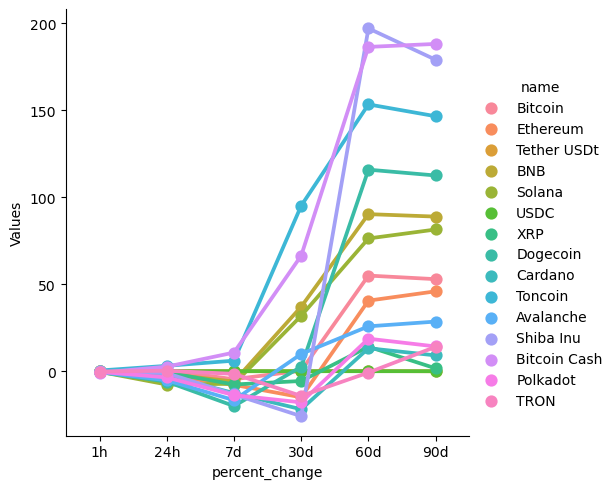

In [21]:
sns.catplot(x="percent_change", y="Values",hue="name", data=df5, kind="point")

### Line Graph 

In [22]:
def plot_price_per_timestamp(crypto_name):
    df_ = df[["name","quote.USD.price","timestamp"]]
    df_ = df_[df_["name"] == crypto_name]
    
    sns.set_theme(style="darkgrid")
    
    plt.figure(figsize=(10,5))
    plt.title(f"Line Graph for {crypto_name}")
    plt.xlabel("Timestamps")
    plt.ylabel("Price")
    sns.lineplot(data=df_, x="timestamp", y="quote.USD.price")
    plt.show()

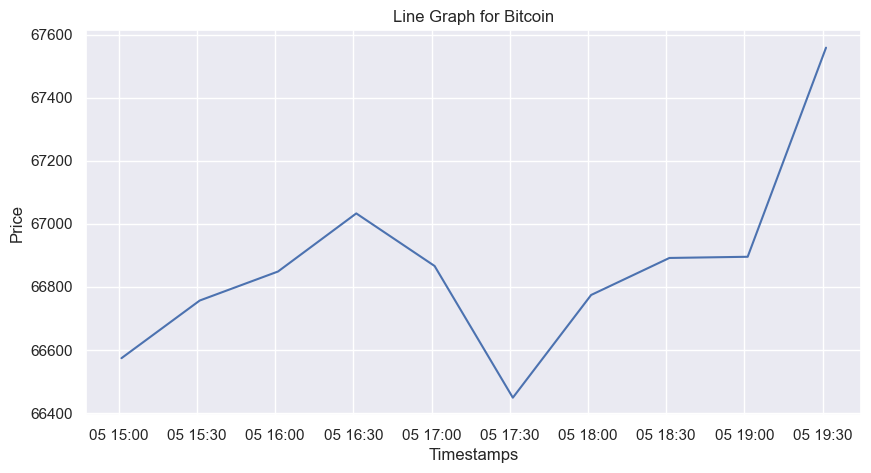

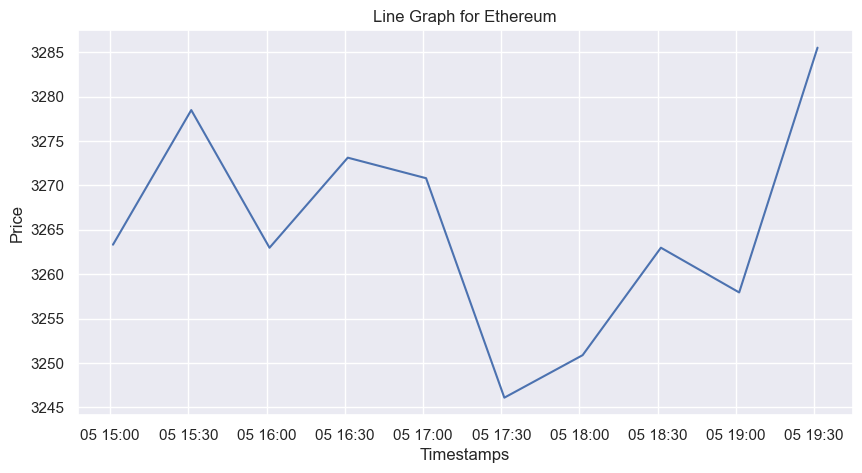

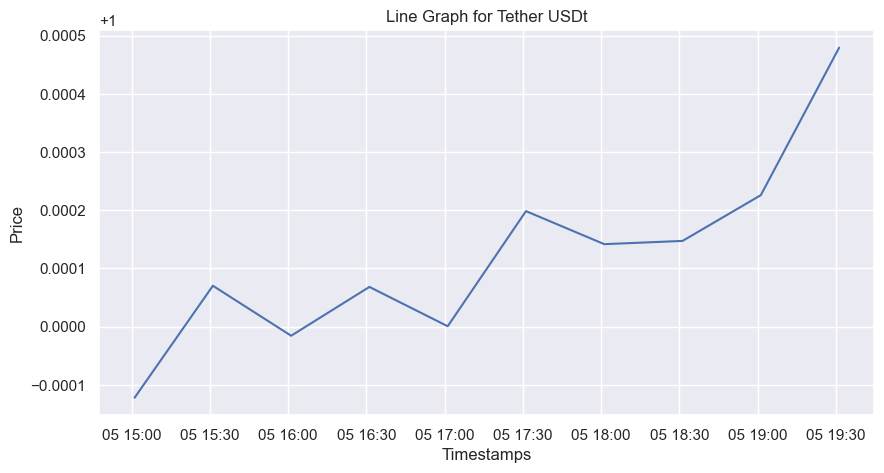

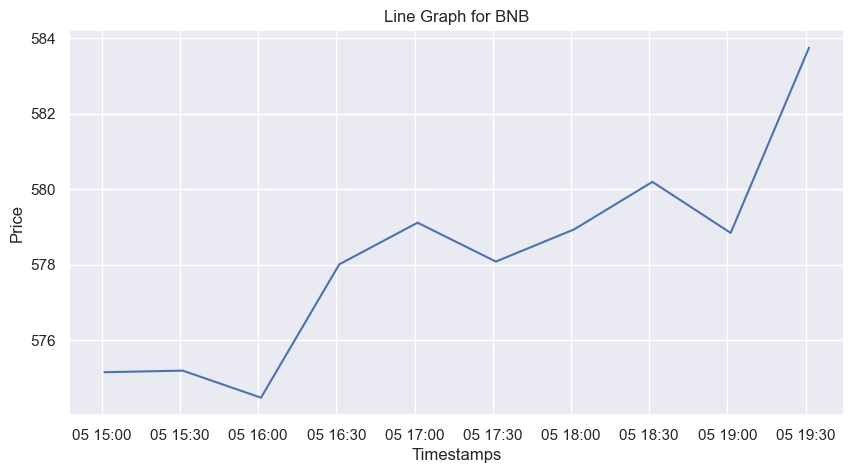

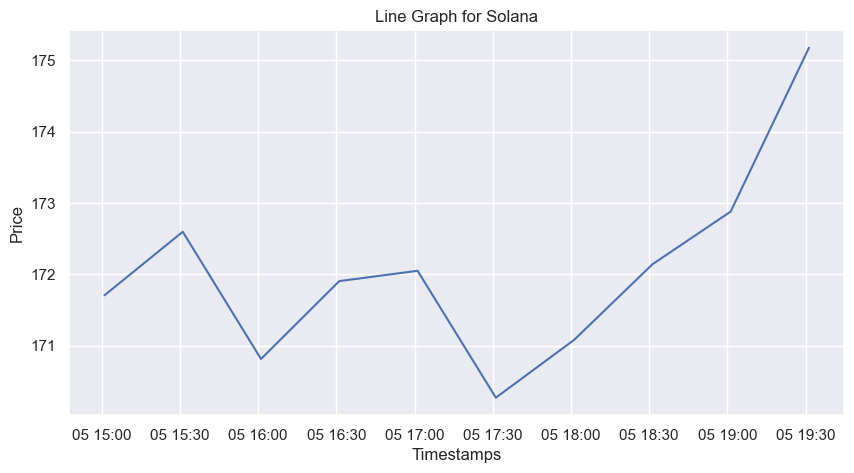

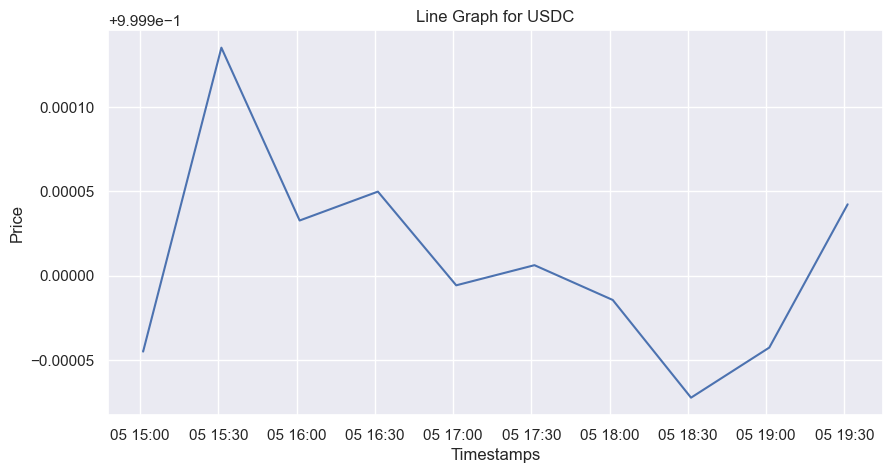

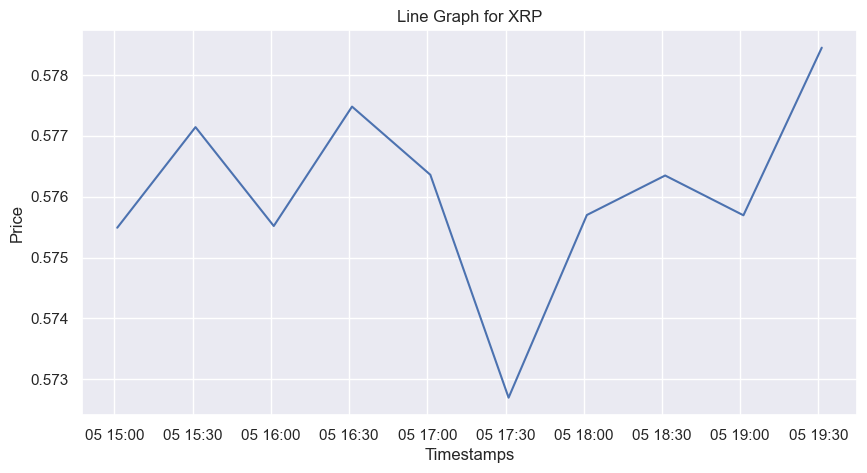

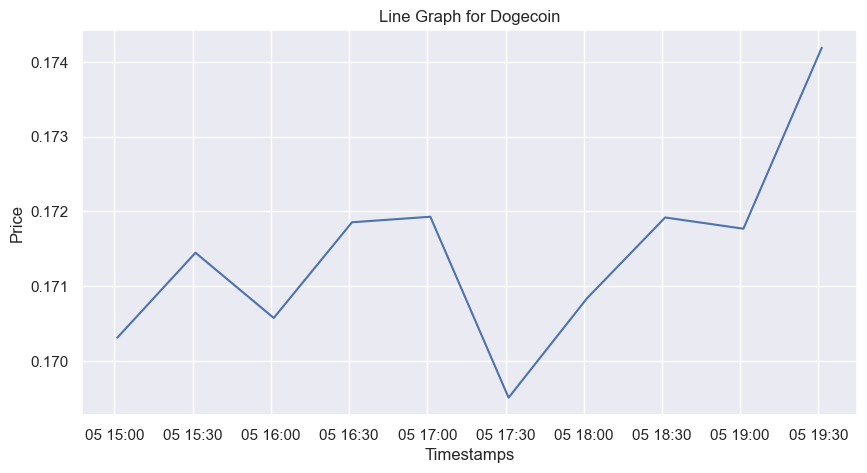

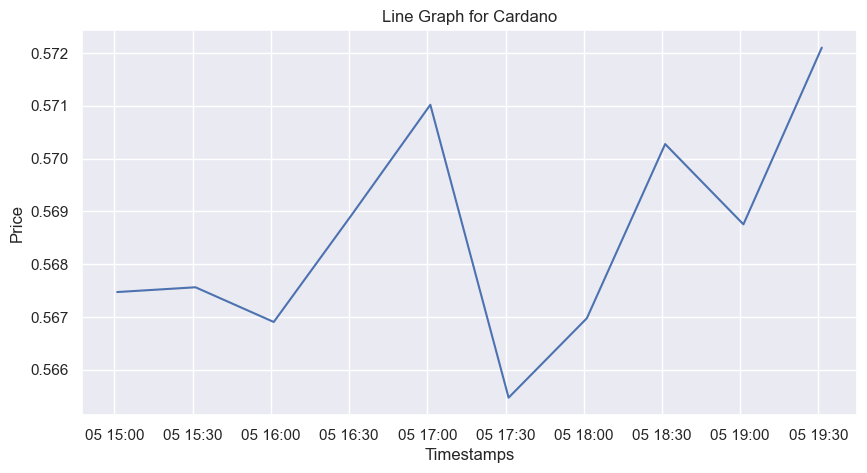

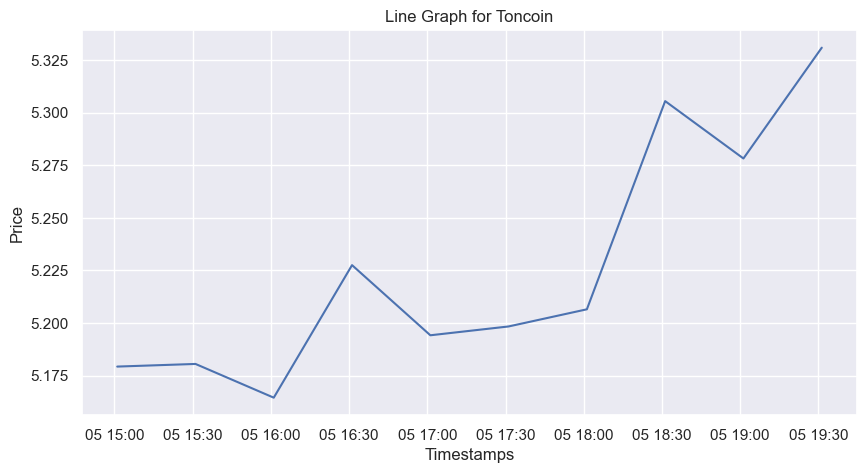

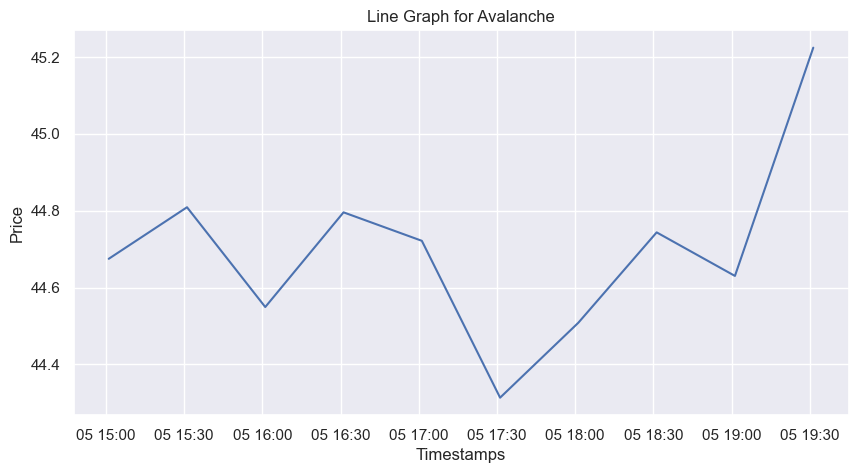

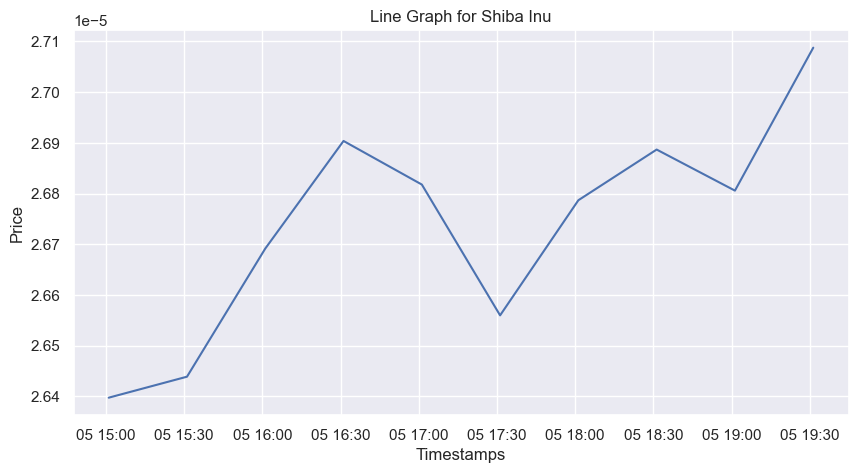

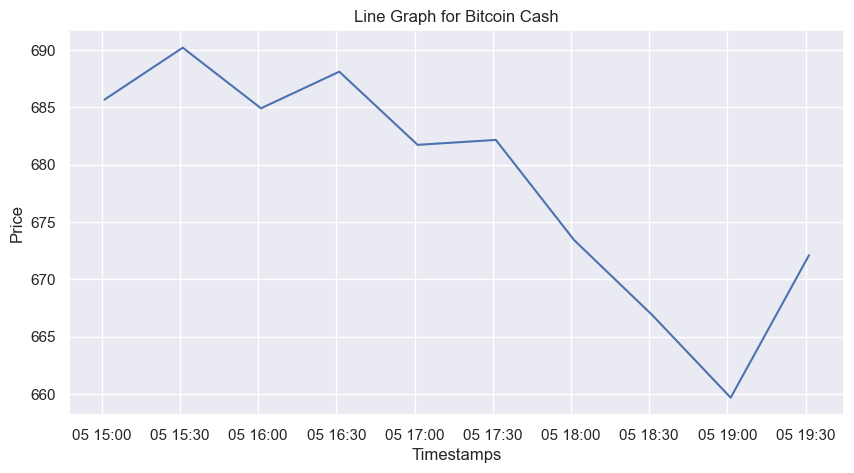

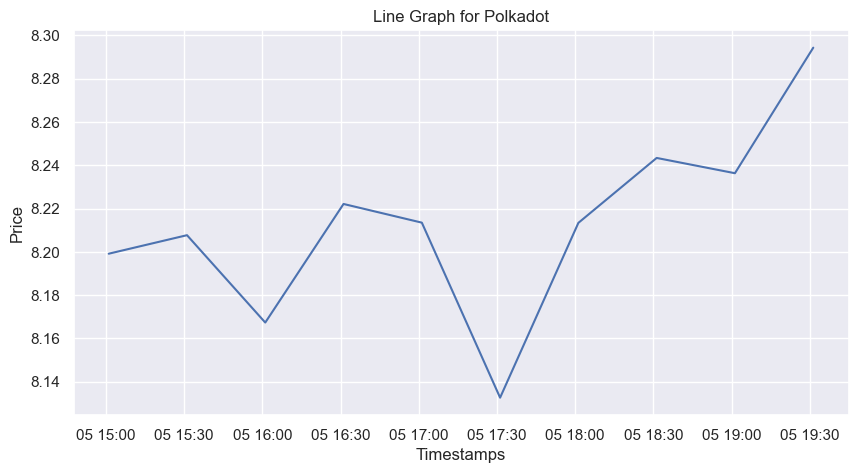

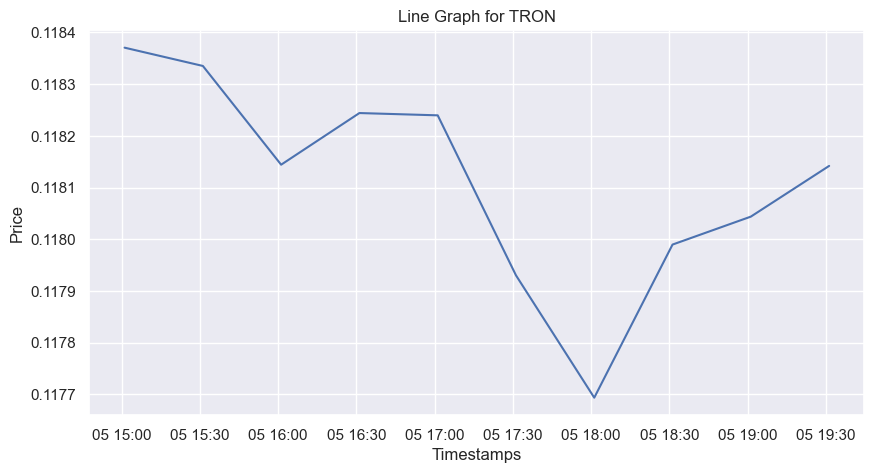

In [23]:
for i in df["name"].unique():
    plot_price_per_timestamp(i)

### Bar Graph

In [24]:
df_price = df.groupby('name', sort=False)["quote.USD.price"].max()
df_price = df_price.reset_index()
df_price

,name,quote.USD.price
0,Bitcoin,67558.52070
1,Ethereum,3285.51514
2,Tether USDt,1.00048
3,BNB,583.74596
4,Solana,175.17449
5,USDC,1.00004
6,XRP,0.57845
7,Dogecoin,0.17419
8,Cardano,0.57210
9,Toncoin,5.33097


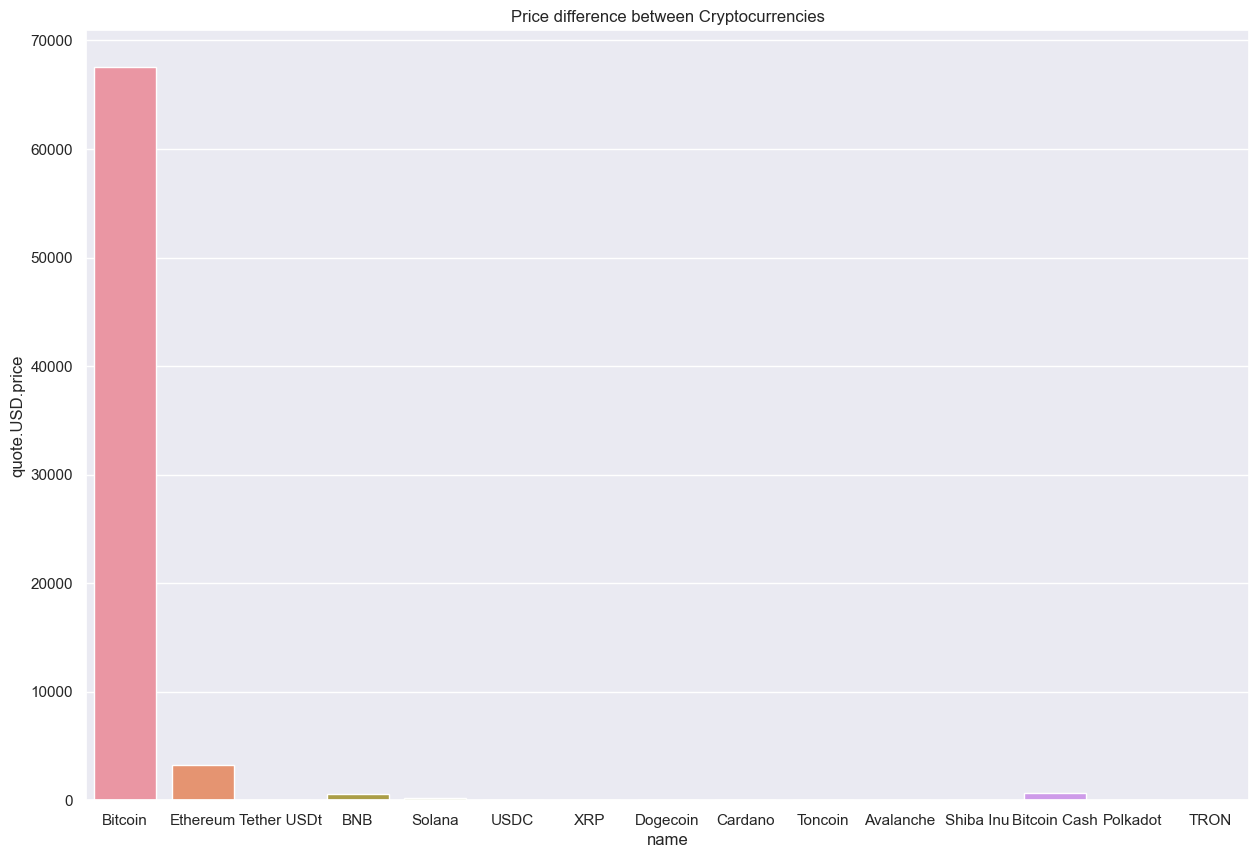

In [25]:
plt.figure(figsize=(15,10))
plt.title("Price difference between Cryptocurrencies")
plt.xlabel("Name")
plt.ylabel("Price")
sns.barplot(data=df_price, x="name", y="quote.USD.price")
plt.show()

The graph provides a visual representation of how Bitcoin's price compares to that of other cryptocurrencies, highlighting its relative expense.